In [ ]:
# Description: machine learning models for detecting fraudulent credit card transactions

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

In [ ]:
# load dataset
dfTrain = pd.read_csv('/content/drive/MyDrive/kaggle/fraudTrain.csv')
dfTest = pd.read_csv('/content/drive/MyDrive/kaggle/fraudTest.csv')

In [ ]:
# check data
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# drop unnecessary columns
dfTrain.drop(['Unnamed: 0','trans_date_trans_time','merchant','first','last','street','zip','dob','trans_num','cc_num'],axis=1,inplace=True)
dfTest.drop(['Unnamed: 0','trans_date_trans_time','merchant','first','last','street','zip','dob','trans_num','cc_num'],axis=1,inplace=True)

In [ ]:
# observe data metrics for train set
dfTrain.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.603160e+02,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,9.650000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,4.752000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,8.314000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
# observe data metrics for test set
dfTest.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,69.392810,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,156.745941,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,1.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,9.630000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,47.290000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,83.010000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,22768.110000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
# explore data for missing values for train and test
print('Missing values is Train set:\n', dfTrain.isnull().sum())
print('\nMissing Values in Test set:\n', dfTest.isnull().sum())

Missing values is Train set:
 category      0
amt           0
gender        0
city          0
state         0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

Missing Values in Test set:
 category      0
amt           0
gender        0
city          0
state         0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64


In [ ]:
# observe datatypes, Train set
dfTrain.dtypes

,0
category,object
amt,float64
gender,object
city,object
state,object
lat,float64
long,float64
city_pop,int64
job,object
unix_time,int64


In [ ]:
# observe data types, test set
dfTest.dtypes

,0
category,object
amt,float64
gender,object
city,object
state,object
lat,float64
long,float64
city_pop,int64
job,object
unix_time,int64


In [ ]:
# initialise label encoder to object types
le = LabelEncoder()
objList = ['gender','category','city','state','job']

for col in objList:
  dfTrain[col] = le.fit_transform(dfTrain[col])
  dfTest[col] = le.fit_transform(dfTest[col])

In [ ]:
# feature scaling
sc = StandardScaler()
numList = ['amt','lat','long','city_pop','unix_time','merch_lat','merch_long']

for col in numList:
  dfTrain[col] = sc.fit_transform(dfTrain[[col]])
  dfTest[col] = sc.fit_transform(dfTest[[col]])

In [ ]:
# observe new data types
dfTrain.dtypes

,0
category,int64
amt,float64
gender,int64
city,int64
state,int64
lat,float64
long,float64
city_pop,float64
job,int64
unix_time,float64


In [ ]:
dfTest.dtypes

,0
category,int64
amt,float64
gender,int64
city,int64
state,int64
lat,float64
long,float64
city_pop,float64
job,int64
unix_time,float64


In [ ]:
# store independant variables in a variables X_train and X_test
X_train = dfTrain.drop('is_fraud',axis=1)
X_test = dfTest.drop('is_fraud',axis=1)

# store dependent variables in variables called Y_train and Y_test
Y_train = dfTrain['is_fraud']
Y_test = dfTest['is_fraud']

# Logistic Regression

In [ ]:
# create machine learning model for Logistic Regression
lr = LogisticRegression().fit(X_train,Y_train)

In [ ]:
# observe model score
lr.score(X_train,Y_train)

0.9936213777546417

In [ ]:
# observe model predictions
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# observe classification report
print(classification_report(Y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [ ]:
# observe accuracy score in percentage form
accuracy_score(Y_test, lr.predict(X_test))
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, lr.predict(X_test)) * 100, 2)}%')

Accuracy score percentage: 99.54%


In [ ]:
# feature importance (using coeffecients)
lr.coef_[0]
lr_features = X_test.columns

# data frame for features and importance scores
lr_feature_importance = pd.DataFrame({'Feature': lr_features, 'Coefficients': lr.coef_[0]})
lr_feature_importance.sort_values(by='Coefficients', ascending=False)
lr_feature_importance

,Feature,Coefficients
0,category,-0.005654
1,amt,0.454774
2,gender,-1.133312
3,city,-0.000508
4,state,-0.023171
5,lat,0.094651
6,long,0.027542
7,city_pop,0.037399
8,job,-0.000927
9,unix_time,-0.103987


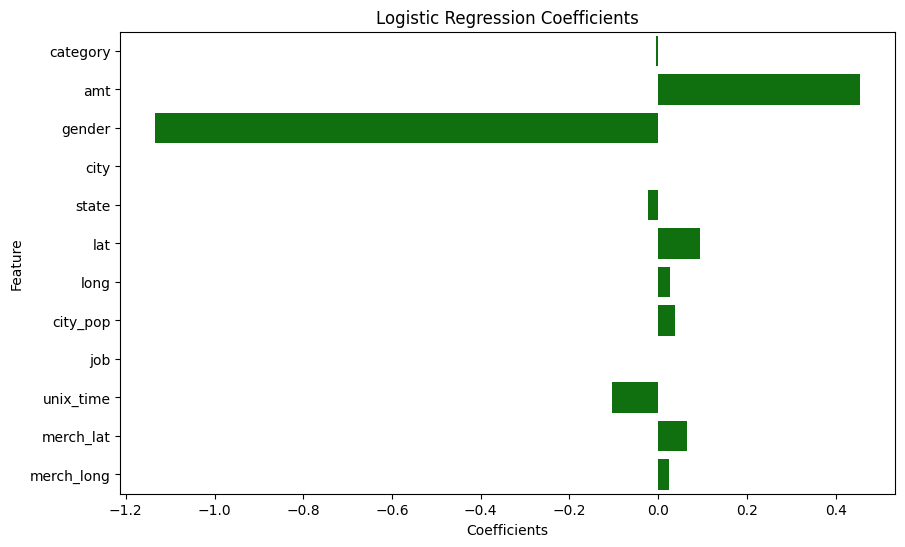

In [ ]:
# feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Feature', data=lr_feature_importance, color='green')
plt.title('Logistic Regression Coefficients')
plt.show()

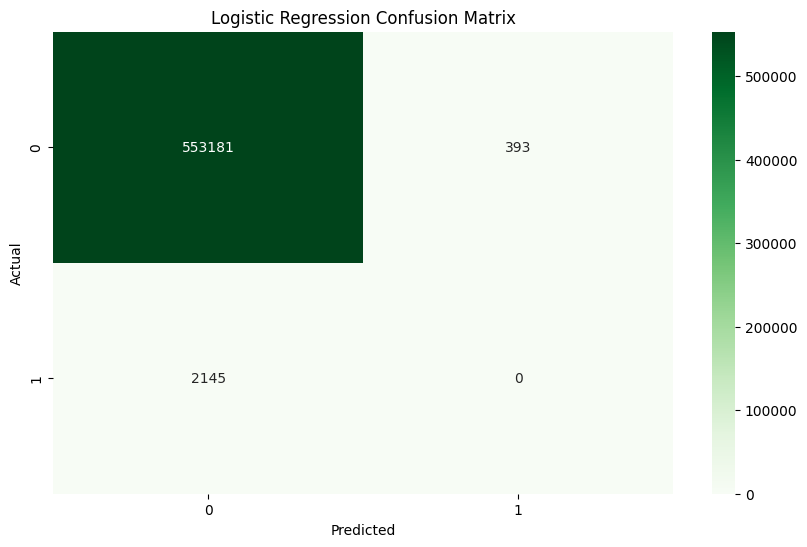

In [ ]:
# plot confusion matrix for logistic Regression
confusion_matrix(Y_test, lr.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, lr.predict(X_test)), annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC: 0.82


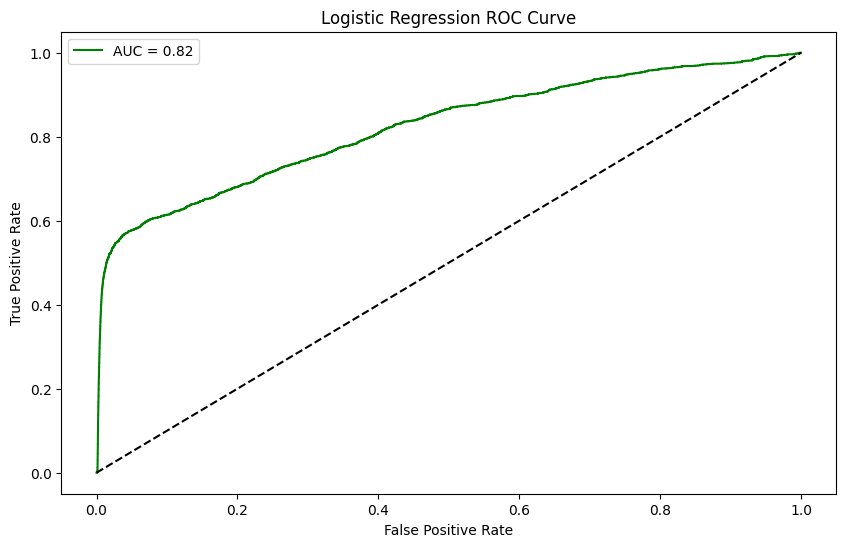

In [ ]:
# ROC curve and AUC score
lr_y_proba = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, lr_y_proba)
print(f'AUC: {auc(lr_fpr, lr_tpr):.2f}')

plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label=f'AUC = {auc(lr_fpr, lr_tpr):.2f}', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# Decision Trees

In [ ]:
# create machine learning model for Decision Trees
dt = DecisionTreeClassifier(random_state=42).fit(X_train,Y_train)

In [ ]:
# observe model score
dt.score(X_train,Y_train)

1.0

In [ ]:
# observe model predictions
dt.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# observe classification report
print(classification_report(Y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.49      0.56      0.53      2145

    accuracy                           1.00    555719
   macro avg       0.75      0.78      0.76    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
# observe accuracy score in percentage form
accuracy_score(Y_test, dt.predict(X_test))
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, dt.predict(X_test)) * 100, 2)}%')

Accuracy score percentage: 99.61%


In [ ]:
# feature importance
dt.feature_importances_
dt_features = X_test.columns

# data frame for features and importance scores
dt_feature_importance = pd.DataFrame({'Feature': dt_features, 'Importance': dt.feature_importances_})
dt_feature_importance.sort_values(by='Importance', ascending=False)
dt_feature_importance

,Feature,Importance
0,category,0.326164
1,amt,0.330818
2,gender,0.012797
3,city,0.033084
4,state,0.020728
5,lat,0.022944
6,long,0.022340
7,city_pop,0.041506
8,job,0.033938
9,unix_time,0.077597


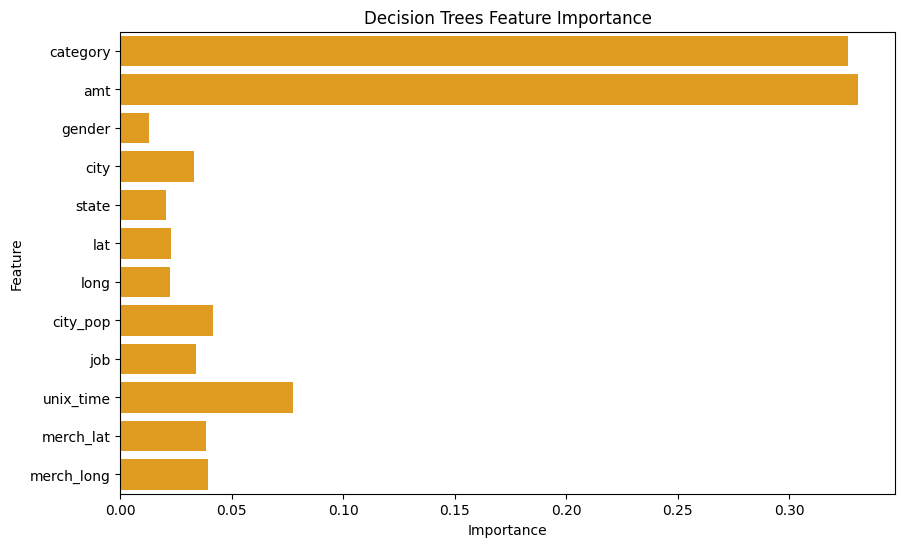

In [ ]:
# feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance, color='orange')
plt.title('Decision Trees Feature Importance')
plt.show()

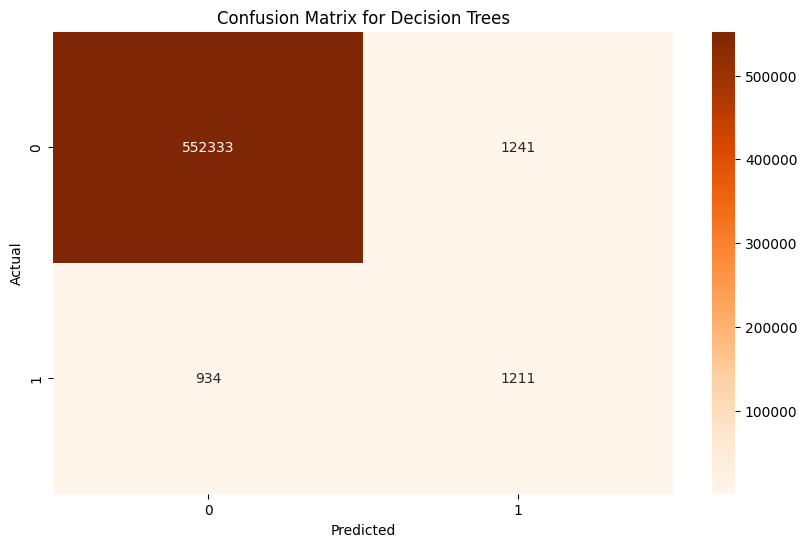

In [ ]:
# plot confusion matrix
confusion_matrix(Y_test, dt.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, dt.predict(X_test)), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix for Decision Trees')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC: 0.78


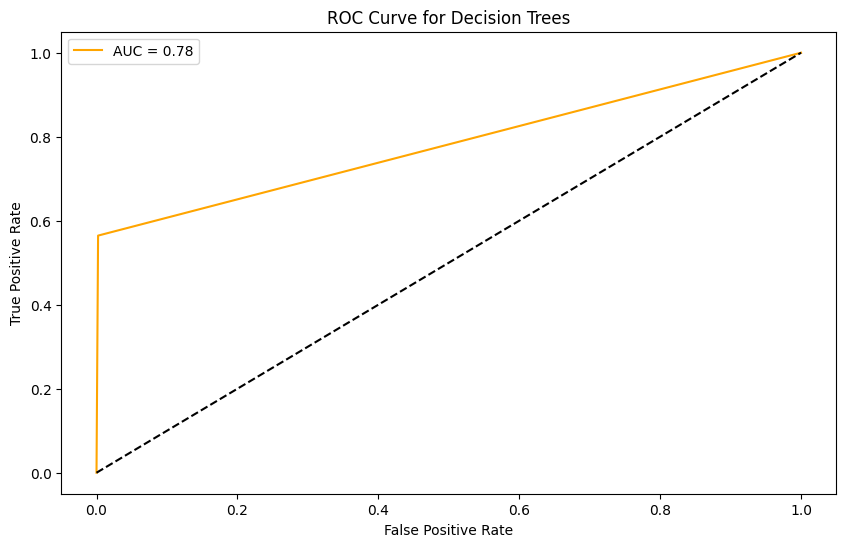

In [ ]:
# ROC curve and AUC score
dt_y_proba = dt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, dt_thresholds = roc_curve(Y_test, dt_y_proba)
print(f'AUC: {auc(dt_fpr, dt_tpr):.2f}')

plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, label=f'AUC = {auc(dt_fpr, dt_tpr):.2f}', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Trees')
plt.legend()
plt.show()

# Random Forest Classifier

In [ ]:
# create machine learning model for Logistic Regression
rfc = RandomForestClassifier(n_estimators=50).fit(X_train,Y_train)

In [ ]:
# observe model score
rfc.score(X_train,Y_train)

0.9999791775117126

In [ ]:
# observe model predictions
rfc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# observe classification report
print(classification_report(Y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.77      0.49      0.60      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.74      0.80    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
# observe accuracy score in percentage form
accuracy_score(Y_test, rfc.predict(X_test))
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, rfc.predict(X_test)) * 100, 2)}%')

Accuracy score percentage: 99.75%


In [ ]:
# feature importance
rfc.feature_importances_
rfc_features = X_test.columns

# dataframe for features and importance scores
rfc_feature_importance = pd.DataFrame({'Feature': rfc_features, 'Importance': rfc.feature_importances_})
rfc_feature_importance.sort_values(by='Importance', ascending=False)
rfc_feature_importance

,Feature,Importance
0,category,0.192474
1,amt,0.406126
2,gender,0.008597
3,city,0.034693
4,state,0.020420
5,lat,0.032027
6,long,0.032178
7,city_pop,0.043187
8,job,0.035438
9,unix_time,0.077758


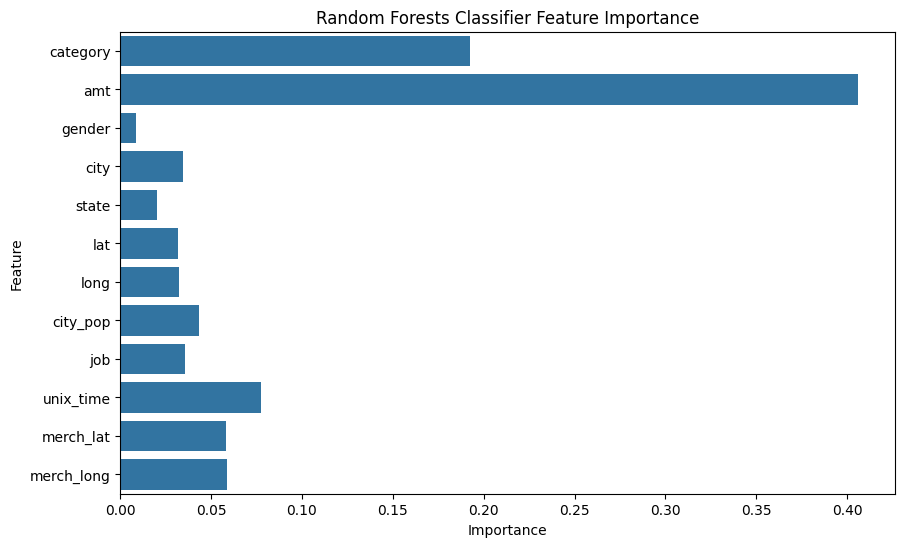

In [ ]:
# feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rfc_feature_importance)
plt.title('Random Forests Classifier Feature Importance')
plt.show()

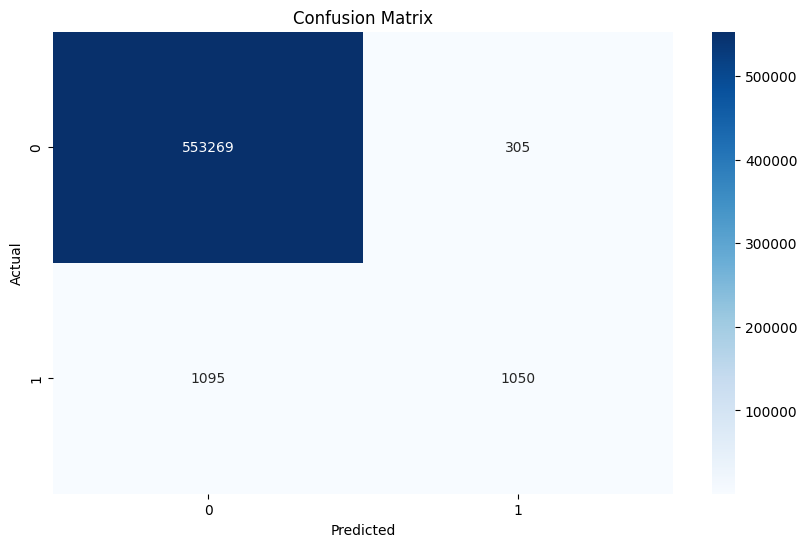

In [ ]:
# plot confusion matrix
confusion_matrix(Y_test, rfc.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, rfc.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC: 0.94


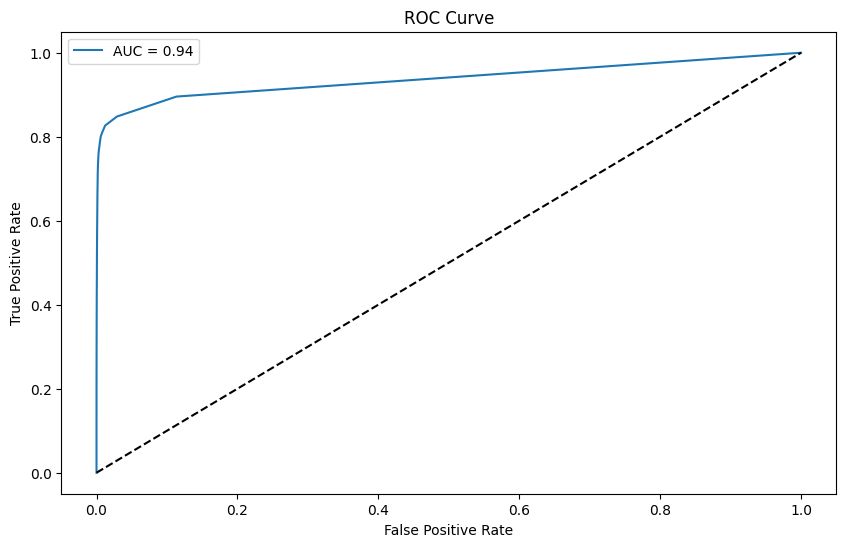

In [ ]:
# ROC curve and AUC score
rfc_y_proba = rfc.predict_proba(X_test)[:, 1]
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(Y_test, rfc_y_proba)
print(f'AUC: {auc(rfc_fpr, rfc_tpr):.2f}')

plt.figure(figsize=(10, 6))
plt.plot(rfc_fpr, rfc_tpr, label=f'AUC = {auc(rfc_fpr, rfc_tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Results

In [ ]:
# create a dataframe to observe models and performance metrics
results = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest Classifier'],
                        'Accuracy': [accuracy_score(Y_test, lr.predict(X_test)) * 100, accuracy_score(Y_test, dt.predict(X_test)) * 100, accuracy_score(Y_test, rfc.predict(X_test)) * 100],
                        'AUC': [auc(lr_fpr, lr_tpr), auc(dt_fpr, dt_tpr), auc(rfc_fpr, rfc_tpr)],
                        'roc_auc': [roc_auc_score(Y_test, lr.predict(X_test)), roc_auc_score(Y_test, dt.predict(X_test)), roc_auc_score(Y_test, rfc.predict(X_test))],
                        'f1_score': [f1_score(Y_test, lr.predict(X_test)), f1_score(Y_test, dt.predict(X_test)), f1_score(Y_test, rfc.predict(X_test))],
                        'precision_score': [precision_score(Y_test, lr.predict(X_test)), precision_score(Y_test, dt.predict(X_test)), precision_score(Y_test, rfc.predict(X_test))],
                        'recall_score': [recall_score(Y_test, lr.predict(X_test)), recall_score(Y_test, dt.predict(X_test)), recall_score(Y_test, rfc.predict(X_test))]
                        })
results

,Model,Accuracy,AUC,roc_auc,f1_score,precision_score,recall_score
0,Logistic Regression,99.543294,0.822241,0.499645,0.000000,0.000000,0.000000
1,Decision Trees,99.608615,0.781163,0.781163,0.526865,0.493883,0.564569
2,Random Forest Classifier,99.748074,0.937213,0.744480,0.600000,0.774908,0.489510
